# TF First Neural Network V2
- Exploring EPOCHS using CallBacks

## Import Libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2.6.0


## Dataset

In [2]:
# define some training data (xs as inputs and ys as outputs)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float) 
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Define Model (NN Arquitecture)

In [3]:
# define a neural network with one neuron
# for more information on TF functions see: https://www.tensorflow.org/api_docs

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

## Compile Model

In [4]:
# use stochastic gradient descent for optimization and
# the mean squared error loss function

model.compile(optimizer='sgd', loss='mean_squared_error')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Viewing initial weights (parameters)

In [6]:
model.get_weights() # list of parameters 

[array([[0.8459481]], dtype=float32), array([0.], dtype=float32)]

In [7]:
print("wi = ", model.get_weights()[0])
print("b  = ", model.get_weights()[1])

wi =  [[0.8459481]]
b  =  [0.]


## Training

In [8]:
predictions = []
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = myCallback()

In [9]:
# fit the model to the data (aka train the model)

history = model.fit(xs, ys, epochs=500, callbacks=[callbacks], verbose=0)

Inspect model

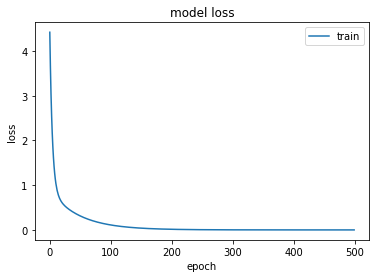

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [11]:
print("wi = ", model.get_weights()[0])
print("b  = ", model.get_weights()[1])

wi =  [[1.9977632]]
b  =  [-0.9930649]


## Test model

In [12]:
# Predict the output of a new data (Inference)

print(model.predict([10.0]))

[[18.984566]]


In [13]:
y_hat = model.predict(xs)
y_hat.shape

(6, 1)

In [14]:
y_hat

array([[-2.990828 ],
       [-0.9930649],
       [ 1.0046983],
       [ 3.0024614],
       [ 5.0002246],
       [ 6.9979877]], dtype=float32)

In [15]:
ys

array([-3., -1.,  1.,  3.,  5.,  7.])

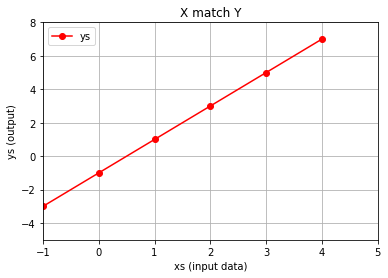

In [16]:
plt.plot(xs, ys, color='red', marker='o', label='ys')
plt.axis([-1,5,-5,8])
plt.title('X match Y')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()

In [17]:
len(predictions)

500

In [21]:
predictions[10]

array([[-1.3970841],
       [ 0.0438943],
       [ 1.4848727],
       [ 2.925851 ],
       [ 4.3668294],
       [ 5.807808 ]], dtype=float32)

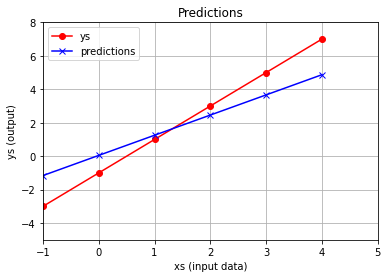

In [19]:
EPOCH = 5
plt.plot(xs, ys, color='red', marker='o', label='ys')
plt.plot(xs, predictions[EPOCH-1], color='blue', marker='x', label='predictions')
plt.axis([-1,5,-5,8])
plt.title('Predictions')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()

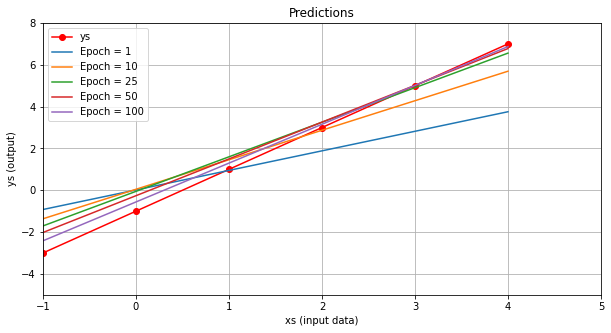

In [20]:
EPOCHS = [1, 10, 25, 50, 100]
plt.figure(figsize=(10,5))
plt.plot(xs, ys, color='red', marker='o', label='ys')
for EPOCH in EPOCHS:
    plt.plot(xs, predictions[EPOCH-1], label = "Epoch = "+str(EPOCH))

plt.axis([-1,5,-5,8])
plt.title('Predictions')
plt.xlabel('xs (input data)')
plt.ylabel('ys (output)')
plt.legend(loc='upper left')
plt.grid()